# Quantum Information and Computing 2022-2023

Nguyen Xuan Tung, ID: 2005491

Week 3, Exercise 3: Random matrix theory.

Study 𝑃(𝑠), the distribution of normalized spacing 𝑠 defined in the previous
exercise, accumulating values from different random matrices of size at least N = 1000

(a)Compute 𝑃(𝑠) for a random hermitian matrix.

(b) Compute 𝑃(𝑠) for a diagonal matrix with real random entries.

(c) Fit the corresponding distributions with the function: $P(s)=a\,s^b\,\exp(-c\,s^d)$
$a,b,c,d$ to be determined



In [19]:
import matplotlib.pyplot as plt               
import numpy as np                            
from scipy.optimize import curve_fit        

In [3]:
s_1 = np.genfromtxt('s_1.csv')   # contains the normalized spacings from random hermitian matrices
s_2 = np.genfromtxt('s_2.csv')   # contains the normalized spacings from random real diagonal matrices

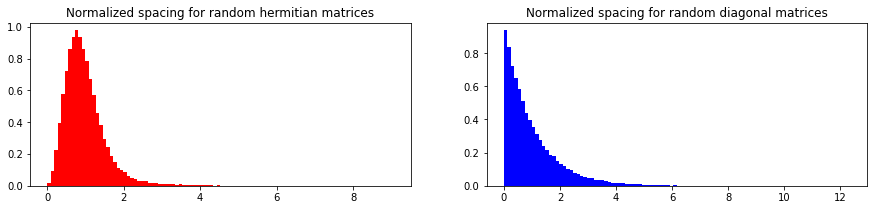

In [15]:
plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

plt.subplot(1, 2, 1)
# Plot the histogram of normalized spacing for random hermitian matrices
count_1, bin_1, _ = plt.hist(s_1[:,1:-1].flatten(),bins=100, density=True, color = 'red')
plt.title('Normalized spacing for random hermitian matrices')

plt.subplot(1, 2, 2)
# Plot the histogram of normalized spacing for random diagonal matrices
count_2, bin_2, _ = plt.hist(s_2[:,1:-1].flatten(),bins=100, density=True, color = 'blue')
plt.title('Normalized spacing for random diagonal matrices')


plt.show()

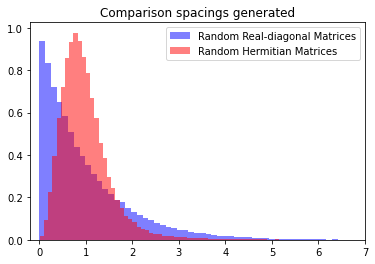

In [11]:
# Plot the histogram in one figure
plt.hist(s_2[:,1:-1].flatten(), bins=100, alpha=0.5, label='Random Real-diagonal Matrices', density=True, color = 'blue')
plt.hist(s_1[:,1:-1].flatten(), bins=100, alpha=0.5, label='Random Hermitian Matrices', density=True,color='red')
plt.legend(loc='upper right')
plt.xlim(-0.2,7)
plt.title("Comparison spacings generated")


plt.show()

The function to fit to the histogram is:
$$P(s)=a\,s^b\,\exp(-c\,s^d)$$
$a,b,c,d$ to be determined

In [6]:
# Function P(x) for fitting
def P(x, a, b, c, d):
    return a * np.power(x,b) * np.exp(-c * np.power(x, d) )

# Function log(P(x)) to avoid overflow in fitting (not used)
def Plog(x, a, b, c, d):
    return np.log(a) + b*np.log(x) - c * np.power(x,d)

In [7]:
# Find the 4 parameters for each histogram
param_1 = curve_fit(P, bin_1[1:], count_1)
param_2 = curve_fit(P, bin_2[1:], count_2)

C:\Users\ADMIN\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Plot histogram and fitted curve for random hermitian matrices

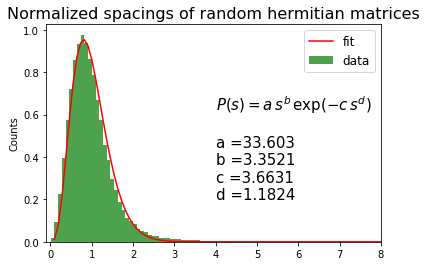

In [8]:
plt.hist(s_1[:,1:-1].flatten(),bins=100,color='forestgreen',label='data', alpha=0.8,density=True)
plt.title('Normalized spacings of random hermitian matrices', fontsize=16)
plt.plot(bin_1[1:],P(bin_1[1:], param_1[0][0], param_1[0][1], param_1[0][2], param_1[0][3]),label='fit',color='red')

plt.text(4,.2, r'$P(s)=a\,s^b\,\exp(-c\,s^d)$' +
             '\n\na ='+str(round(param_1[0][0],4))+'\nb ='+str(round(param_1[0][1],4))+
               '\nc ='+str(round(param_1[0][2],4))+'\nd ='+str(round(param_1[0][3],4)),
         fontdict = {'fontsize' : 15})

plt.xlim(-.1,8)
plt.legend(prop={'size': 12})
plt.ylabel('Counts')


plt.show()

Plot histogram and fitted curve for random diagonal matrices

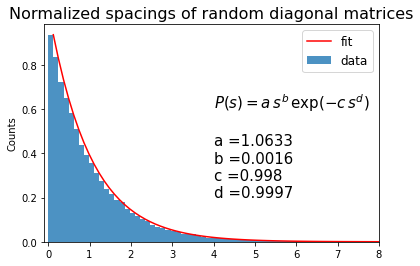

In [16]:
plt.hist(s_2[:,1:-1].flatten(),bins=100,label='data', alpha=0.8,density=True,color='#1f77b4')
plt.title('Normalized spacings of random diagonal matrices', fontsize=16)
plt.plot(bin_2[1:],P(bin_2[1:], param_2[0][0], param_2[0][1], param_2[0][2], param_2[0][3]),label='fit',color='red')

plt.text(4,.2, r'$P(s)=a\,s^b\,\exp(-c\,s^d)$' +
             '\n\na ='+str(round(param_2[0][0],4))+'\nb ='+str(round(param_2[0][1],4))+
               '\nc ='+str(round(param_2[0][2],4))+'\nd ='+str(round(param_2[0][3],4)),
         fontdict = {'fontsize' : 15})

plt.xlim(-.1,8)
plt.legend(prop={'size': 12})
plt.ylabel('Counts')


plt.show()